In [93]:
import pandas as pd
import numpy as np

import seaborn as sns

In [94]:
df = pd.read_csv('../data/final_dataset.csv')
df.head()

,date,open,high,low,close,volume,range_estimate,up
0,1,67636.46,67999.29,67636.46,67855.65,4.406215e+05,104.739999,1
1,1,67558.12,67851.44,67558.12,67636.46,3.622642e+05,84.674190,1
2,1,67633.59,67881.27,67558.12,67558.12,3.692816e+05,93.285370,0
3,1,67388.42,67748.76,67308.89,67633.59,1.361001e+06,126.979531,1
4,1,67625.92,68077.59,67369.00,67388.42,7.325875e+06,204.552314,0


In [95]:
# Calculate the simple moving average (SMA) and exponential moving average (EMA)
ema = df['close'].ewm(span=72, adjust=False).mean()

# Get the last SMA and EMA values as the prediction for the next 24 hours
ema_prediction = ema.iloc[:24]

print("Predicted EMA for the next 24 hours:", ema_prediction)


Predicted EMA for the next 24 hours: 0     67855.650000
1     67849.644795
2     67841.657814
3     67835.957326
4     67823.696029
5     67818.277508
6     67807.106343
7     67812.461512
8     67824.642018
9     67835.416758
10    67827.212463
11    67802.105272
12    67765.824032
13    67745.466661
14    67720.139355
15    67702.457729
16    67681.320805
17    67666.519687
18    67646.313394
19    67647.000425
20    67653.257947
21    67652.766497
22    67667.238647
23    67694.718137
Name: close, dtype: float64


In [96]:
fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns

df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')


In [97]:
from sklearn.model_selection import train_test_split

features = ['open', 'high', 'low', 'close', 'volume']
target = 'up'
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3)

In [98]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [99]:
# Predict the target values for the test set
# And put them in a 0-1 range
predictions = model.predict(x_test)
predictions = np.clip(predictions, 0, 1)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions.round())
print("Accuracy:", accuracy)

Accuracy: 0.8665442986972288


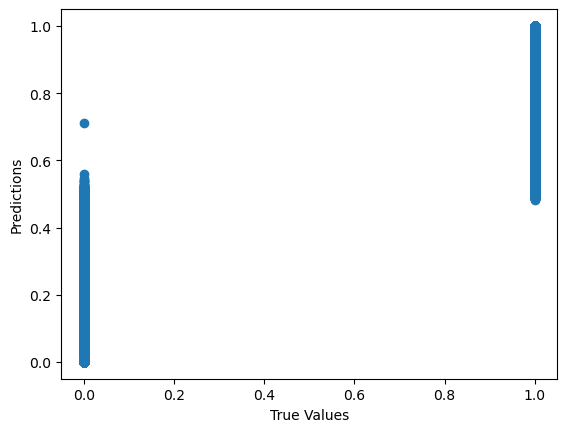

In [100]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()